In [4]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import seaborn as sns; sns.set()
import utils as u
import numpy as np
from subprocess import call
from PIL import Image
from cv2 import imwrite
import os

In [12]:
for h in range(5):
    if not os.path.exists('expTamEntr1'):
        os.makedirs('expTamEntr1')
    for i in range(3):
        fileTr = open("expTamEntr1/train{}r{}.in".format(h+1, i+1),"w+")
        fileTe = open("expTamEntr1/test{}r{}.in".format(h+1, i+1),"w+")
        for j in range(41):
            a=[1,2,3,4,5,6,7,8,9,10]
            for k in range(h+1):
                l=np.random.randint(0, len(a))
                fileTr.write("../assets/ImagenesCaras/s{}/{}.pgm, {},\n".format(j+1, a.pop(l), j+1))
            for k in range(len(a)):
                fileTe.write("../assets/ImagenesCaras/s{}/{}.pgm,\n".format(j+1, a.pop(0)))
        fileTr.close()
        fileTe.close()

In [13]:
knn = 3
a = 17
train = []
test = []
for i in range(3):
    train.append([])
    test.append([])
    for j in range(5):
        test[i].append('expTamEntr1/test{}r{}.in'.format(j+1,i+1))
        train[i].append('expTamEntr1/train{}r{}.in'.format(j+1,i+1))
out = 'expTamEntr1/result{}r{}'
for i in range(3):
    for j in range(5):
        call(['../src/main', '-m', '1', '-i', train[i][j], '-q', test[i][j], '-o', out.format(j+1,i+1), '-knn-k', str(knn), '-alpha', str(a)])

In [87]:
for p in range(8):
    if not os.path.exists('expTamEntr2'):
        os.makedirs('expTamEntr2')
    for i in range(3):
        fileTr = open("expTamEntr2/train{}.in".format(p+1),"w+")
        fileTe = open("expTamEntr2/test{}.in".format(p+1),"w+")
        for j in range(40):
            a=[1,2,3,4,5,6,7,8,9,10]
            for k in range(8):
                l=np.random.randint(0, len(a))
                fileTr.write("../assets/ImagenesCaras/s{}/{}.pgm, {},\n".format(j+1, a.pop(l), j+1))
            for k in range(len(a)):
                fileTe.write("../assets/ImagenesCaras/s{}/{}.pgm,\n".format(j+1, a.pop(0)))
        a=[1,2,3,4,5,6,7,8,9,10]
        for k in range(p+1):
            l=np.random.randint(0, len(a))
            fileTr.write("../assets/ImagenesCaras/s41/{}.pgm, 41,\n".format(a.pop(l)))
        for k in range(len(a)):
            fileTe.write("../assets/ImagenesCaras/s41/{}.pgm,\n".format(a.pop(0)))
        fileTr.close()
        fileTe.close()

In [88]:
knn = 3
a = 17
train = []
test = []
out = []

for i in range(8):
    train.append("expTamEntr2/train{}.in".format(i+1))
    test.append("expTamEntr2/test{}.in".format(i+1))
    out.append('expTamEntr2/result{}'.format(i+1))
for i in range(8):
    call(['../src/main', '-m', '1', '-i', train[i], '-q', test[i], '-o', out[i], '-knn-k', str(knn), '-alpha', str(a)])

In [91]:
allVects = []
for k in range(4):
    allVects.append([])
    for l in range(3):
        i=0
        j=-1
        file = open("expTamEntr1/result{}r{}".format(k+1,l+1),"r")
        filestr = file.read().split(',\n')
        filevect = []
        for i in range(len(filestr)-1):
            filevect.append(int(filestr[i]))
        allVects[k].append(filevect)
        file.close()
allExpectedVect = []
for k in range(4):
    allExpectedVect.append([])
    for i in range(41):
        for j in range(9-k):
            allExpectedVect[k].append(i+1)
lab=[i+1 for i in range(41)]
allPrecs = []
for i in range(4):
    allPrecs.append([])
    for j in range(3):
        allPrecs[i].append(precision_recall_fscore_support(allExpectedVect[i], allVects[i][j], labels=lab)[1])
allPrecsMean = []
for i in range(4):
    allPrecsMean.append((allPrecs[i][0]+allPrecs[i][1]+allPrecs[i][2])/3)

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [99]:
allVects = []
for k in range(4):
    allVects.append([])
    for l in range(3):
        i=0
        j=-1
        file = open("expTamEntr1/result{}r{}".format(k+1,l+1),"r")
        filestr = file.read().split(',\n')
        filevect = []
        for i in range(len(filestr)-1):
            filevect.append(int(filestr[i]))
        allVects[k].append(filevect)
        file.close()
allExpectedVect = []
for k in range(4):
    allExpectedVect.append([])
    for i in range(41):
        for j in range(9-k):
            allExpectedVect[k].append(i+1)
lab=[i+1 for i in range(41)]
allRec = []
for i in range(4):
    allRec.append([])
    for j in range(3):
        allRec[i].append(precision_recall_fscore_support(allExpectedVect[i], allVects[i][j], labels=lab)[2])
allRecMean = []
for i in range(4):
    allRecMean.append((allRec[i][0]+allRec[i][1]+allRec[i][2])/3)

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


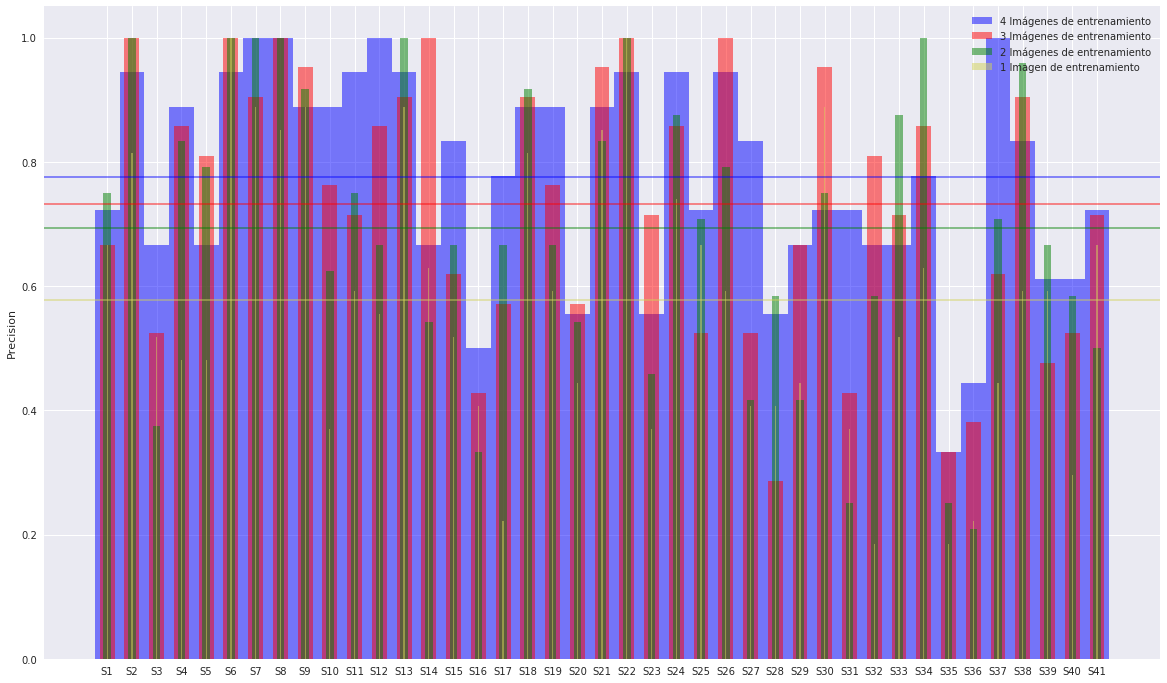

In [104]:
plt.bar(lab, allPrecsMean[3], color='b', alpha=0.5, width=1, label='4 Imágenes de entrenamiento')
plt.bar(lab, allPrecsMean[2], color='r', alpha=0.5, width=0.6, label='3 Imágenes de entrenamiento')
plt.bar(lab, allPrecsMean[1], color='g', alpha=0.5, width=0.3, label='2 Imágenes de entrenamiento')
plt.bar(lab, allPrecsMean[0], color='#d3d358', alpha=0.5, width=0.05, label='1 Imagen de entrenamiento')
plt.ylabel('Precision')
plt.axhline(allPrecsMean[3].mean(), color='b', alpha=0.5)
plt.axhline(allPrecsMean[2].mean(), color='r', alpha=0.5)
plt.axhline(allPrecsMean[1].mean(), color='g', alpha=0.5)
plt.axhline(allPrecsMean[0].mean(), color='#d3d358', alpha=0.5)

plt.xticks(lab, 
           ['S{}'.format(i+1) for i in range(41)] )

plt.legend()

plt.rcParams['figure.figsize'] = (30, 18)

plt.show()

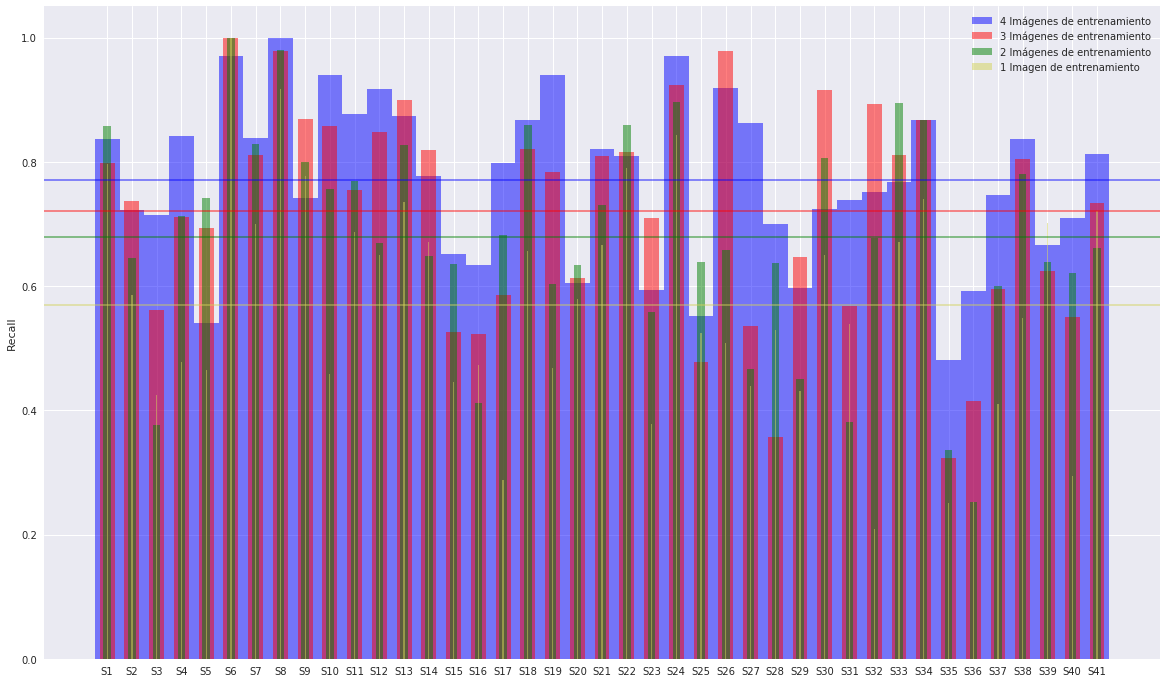

In [108]:
plt.bar(lab, allRecMean[3], color='b', alpha=0.5, width=1, label='4 Imágenes de entrenamiento')
plt.bar(lab, allRecMean[2], color='r', alpha=0.5, width=0.6, label='3 Imágenes de entrenamiento')
plt.bar(lab, allRecMean[1], color='g', alpha=0.5, width=0.3, label='2 Imágenes de entrenamiento')
plt.bar(lab, allRecMean[0], color='#d3d358', alpha=0.5, width=0.05, label='1 Imagen de entrenamiento')
plt.ylabel('Recall')
plt.axhline(allRecMean[3].mean(), color='b', alpha=0.5)
plt.axhline(allRecMean[2].mean(), color='r', alpha=0.5)
plt.axhline(allRecMean[1].mean(), color='g', alpha=0.5)
plt.axhline(allRecMean[0].mean(), color='#d3d358', alpha=0.5)

plt.xticks(lab, 
           ['S{}'.format(i+1) for i in range(41)] )

plt.legend()

plt.rcParams['figure.figsize'] = (30, 18)

plt.show()

In [69]:
allVects = []
for k in range(8):
    allVects.append([])
    i=0
    j=-1
    file = open("expTamEntr2/result{}".format(k+1),"r")
    filestr = file.read().split(',\n')
    filevect = []
    for i in range(len(filestr)-1):
        filevect.append(int(filestr[i]))
    allVects[k].append(filevect)
    file.close()
allExpectedVect = []
for k in range(4):
    allExpectedVect.append([])
    for i in range(41):
        for j in range(9-k):
            allExpectedVect[k].append(i+1)
lab=[i+1 for i in range(41)]
allPrecs = []
for i in range(4):
    allPrecs.append([])
    for j in range(3):
        allPrecs[i].append(precision_recall_fscore_support(allExpectedVect[i], allVects[i][j], labels=lab)[1])
allPrecsMean = []
for i in range(4):
    allPrecsMean.append((allPrecs[i][0]+allPrecs[i][1]+allPrecs[i][2])/3)

[[0.5714285714285714, 0.0, 0.0], [0.0, 0.7272727272727273, 0.0], [0.0, 0.0, 7.0]]


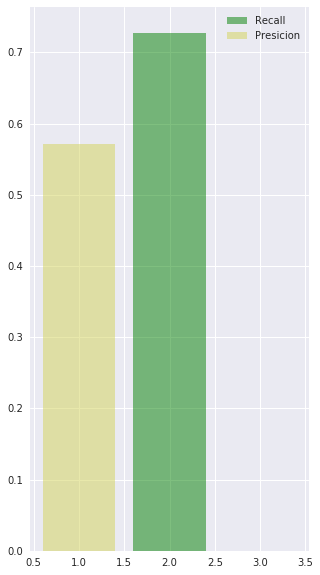

In [83]:
#plt.bar([1,2,3], allv[2], color='r', alpha=0.5, label='F1-Score')
plt.bar([1,2,3], allv[1], color='g', alpha=0.5, label='Recall')
plt.bar([1,2,3], allv[0], color='#d3d358', alpha=0.5, label='Presicion')

# plt.xticks(lab, 
#            ['Presicion', 'Recall', 'F1-Score'] )

plt.legend()
plt.rcParams['figure.figsize'] = (5, 10)
